In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

train = datasets.MNIST("", train = True, download = True, 
                       transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download = True, 
                       transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # 784 comes from 28*28 pixels which has to be flattened
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim = 1)
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [2]:
X = torch.rand([28, 28])
X = X.view(-1, 28*28)
output = net(X)

In [3]:
output

tensor([[-2.3388, -2.4513, -2.3837, -2.1710, -2.3153, -2.2490, -2.2295, -2.4059,
         -2.2268, -2.2905]], grad_fn=<LogSoftmaxBackward>)

In [6]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0183, grad_fn=<NllLossBackward>)
tensor(0.1011, grad_fn=<NllLossBackward>)
tensor(0.0036, grad_fn=<NllLossBackward>)


In [9]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.969


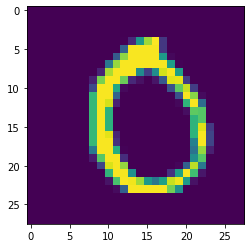

In [16]:
import matplotlib.pyplot as plt

plt.imshow(X[3].view(28,28))
plt.show()

In [17]:
print(torch.argmax(net(X[3].view(-1, 784))[0]))

tensor(0, grad_fn=<NotImplemented>)
